# Learning graph from data

Script that lets your learn a pair-wise conditionally independence graph based on CG models from data.

In [2]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [6]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "CGmodelselection/datasets/iris.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

Disable autoscrolling for outputs.

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

Filename: CGmodelselection/datasets/iris.csv
Using a dataset with 150 samples, 1 discrete and 4 continuous variables.
Discrete Variables: ['species']
Continuous Variables: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Solving problem.. Done.


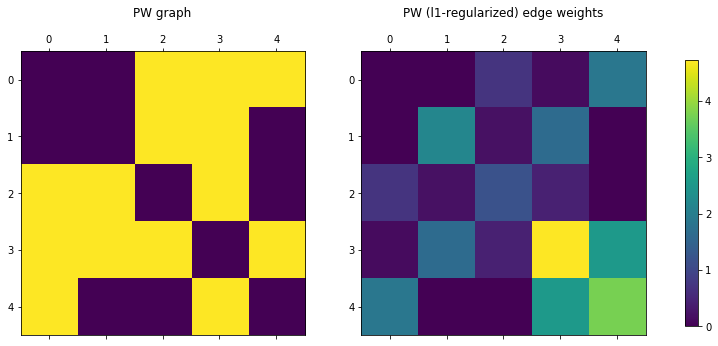

Legend:
0 - species
1 - sepal_length
2 - sepal_width
3 - petal_length
4 - petal_width


In [8]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(filename, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

In [17]:
def to_json(pci_graph):
    """Returns a serializable dict that has keys with values as follows:
        'nodes': list of string labels of nodes
        'edges': list of dict with keys source, target, weight
    """
    weights = pci_graph['weight_matrix']
    binary = pci_graph['binary_matrix']
    labels = pci_graph['dimension_label']
    edges = []

    for i in range(weights.shape[0]):
        for j in range(i, weights.shape[1]):
            if binary[i,j]:
                #print('i={0}, j={1}'.format(i,j))
                edges.append({
                    'source': labels[i],
                    'target': labels[j],
                    'weight': weights[i, j],
                })

    return {
        'nodes': labels,
        'edges': edges,
    }

In [18]:
from mb_modelbase.utils import update_opts
#del create
def create(df, **kwargs):
    """Create and return a pair-wise conditionally independence graph for given DataFrame df."""

    valid_create_opts = {
        'standardize': [True, False],
        'model': ['PW', 'CLZ'],
        'disp': [False]
    }
    default_create_opts = {
        'standardize': True,  # standardize data before learning (recommended)
        'model': 'PW',   # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
        'graphthreshold': 1e-1,  # trade-off parameter for l1-regularization term
        'kS': 2,  # regularization parameter for l1 regularization
        'disp': False,
    }
    opts = update_opts(default_create_opts, kwargs, valid_create_opts)

    grpnormmat, graph, dlegend = get_graph_from_data(df, **opts)
    return {
        "weight_matrix": grpnormmat,
        "binary_matrix": graph,
        "dimension_label": dlegend,
        "opts": opts,
    }

In [19]:
pci_graph = {
        "weight_matrix": grpnormmat,
        "binary_matrix": graph,
        "dimension_label": dlegend
    }

In [20]:
import pandas as pd
df = pd.read_csv('CGmodelselection/datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
foo = create(df)
foo

{'binary_matrix': array([[False, False,  True,  True,  True],
        [False, False,  True,  True, False],
        [ True,  True, False,  True, False],
        [ True,  True,  True, False,  True],
        [ True, False, False,  True, False]]),
 'dimension_label': {0: 'species',
  1: 'sepal_length',
  2: 'sepal_width',
  3: 'petal_length',
  4: 'petal_width'},
 'opts': {'disp': False,
  'graphthreshold': 0.1,
  'kS': 2,
  'model': 'PW',
  'standardize': True},
 'weight_matrix': array([[0.00000000e+00, 8.33463292e-05, 7.14932961e-01, 1.40744870e-01,
         1.86651037e+00],
        [8.33463292e-05, 0.00000000e+00, 2.05527437e-01, 1.65847069e+00,
         9.34653751e-05],
        [7.14932961e-01, 2.05527437e-01, 0.00000000e+00, 4.29175570e-01,
         4.09705988e-05],
        [1.40744870e-01, 1.65847069e+00, 4.29175570e-01, 0.00000000e+00,
         2.53157890e+00],
        [1.86651037e+00, 9.34653751e-05, 4.09705988e-05, 2.53157890e+00,
         0.00000000e+00]])}

In [22]:
foo['dimension_label']

{0: 'species',
 1: 'sepal_length',
 2: 'sepal_width',
 3: 'petal_length',
 4: 'petal_width'}

In [23]:
to_json(foo)

{'edges': [{'source': 'species',
   'target': 'sepal_width',
   'weight': 0.7149329610107523},
  {'source': 'species',
   'target': 'petal_length',
   'weight': 0.14074486966148353},
  {'source': 'species', 'target': 'petal_width', 'weight': 1.8665103697775873},
  {'source': 'sepal_length',
   'target': 'sepal_width',
   'weight': 0.20552743677579877},
  {'source': 'sepal_length',
   'target': 'petal_length',
   'weight': 1.6584706911489808},
  {'source': 'sepal_width',
   'target': 'petal_length',
   'weight': 0.42917556995019096},
  {'source': 'petal_length',
   'target': 'petal_width',
   'weight': 2.5315788998632964}],
 'nodes': {0: 'species',
  1: 'sepal_length',
  2: 'sepal_width',
  3: 'petal_length',
  4: 'petal_width'}}

In [22]:
pci_graph['weight_matrix']

array([[0.00000000e+00, 8.33463292e-05, 7.14932961e-01, 1.40744870e-01,
        1.86651037e+00],
       [8.33463292e-05, 0.00000000e+00, 2.05527437e-01, 1.65847069e+00,
        9.34653751e-05],
       [7.14932961e-01, 2.05527437e-01, 0.00000000e+00, 4.29175570e-01,
        4.09705988e-05],
       [1.40744870e-01, 1.65847069e+00, 4.29175570e-01, 0.00000000e+00,
        2.53157890e+00],
       [1.86651037e+00, 9.34653751e-05, 4.09705988e-05, 2.53157890e+00,
        0.00000000e+00]])

**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [5]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
4-3	2.53
4-0	1.87
3-1	1.66
2-0	0.71
3-2	0.43
2-1	0.21
3-0	0.14


In [6]:
# print all edges
all_ordered_edges

[(2.5316271269980142, (4, 3)),
 (1.8665811666620116, (4, 0)),
 (1.6584870326637182, (3, 1)),
 (0.71493664893482634, (2, 0)),
 (0.42919539066998397, (3, 2)),
 (0.20551741556151062, (2, 1)),
 (0.14069238384717406, (3, 0)),
 (9.3433223095025321e-05, (4, 1)),
 (8.3334998038462108e-05, (1, 0)),
 (4.0943646435990299e-05, (4, 2))]